In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt

upl = files.upload()

Saving 888 - Foglio1.csv to 888 - Foglio1 (2).csv


In [ ]:

file_rd = pd.read_csv( io.BytesIO( upl['888 - Foglio1.csv'] ) )
file_dt = pd.DataFrame( file_rd )
file_dt

,GIORNO,TIPO,SCOMMESSA,QUOTA,PROFITTO,VITTORIA,TOTALE,Unnamed: 7,Unnamed: 8
0,9 genn,BASKET_M,"€ 10,00","3,9","-€ 10,00",0,"-€ 10,00",NaN,NaN
1,9 genn,BASKET_M,"€ 20,00","3,1","€ 42,00",1,"€ 32,00",NaN,NaN
2,9 genn,ATP,"€ 10,00","1,16","€ 1,60",1,"€ 33,60",NaN,NaN
3,9 genn,BASKET_M,"€ 15,00","2,43","-€ 15,00",0,"€ 18,60",SOMMA:,"€ 100,10"
4,9 genn,ATP,"€ 20,00","1,18","€ 3,60",1,"€ 22,20",NaN,NaN
...,...,...,...,...,...,...,...,...,...
67,9 genn,BASKET_M,"€ 10,00","2,85","-€ 10,00",0,"€ 92,60",NaN,NaN
68,9 genn,ITF_M,"€ 10,00","1,2","€ 2,00",1,"€ 94,60",NaN,NaN
69,9 genn,ITF_M,"€ 10,00","1,16","€ 1,60",1,"€ 96,20",NaN,NaN
70,9 genn,ITF_M,"€ 10,00","1,22","€ 2,20",1,"€ 98,40",NaN,NaN


In [ ]:
def ANALISI( label ):
    print("Running "+label+"...")
    file_atp = file_dt.loc[ ( file_dt.TIPO==label ) ]
    #file_atp
    qt = list( file_atp['QUOTA'] )
    scms = list( file_atp['SCOMMESSA'] )

    quote = []
    for q in qt:
      q = q.replace(",", ".")
      q = float( q )
      quote.append( q )

    scommesse = []
    for s in scms:
      s = s.replace(",", ".")
      s = s.replace("€", "")
      s = s.strip()
      s = float( s )
      scommesse.append( s )

    profitto_atp = list( file_atp.PROFITTO )
    profitto_atp_ord = []
    segni = []
    for idx, v in enumerate ( profitto_atp ):
        v = v.replace("€", "")
        v = v.strip()
        v = v.replace(',', '.')
        if "-" in v:
            segni.append( -1 )
        else:
            segni.append( 1 )
        v = v.replace('-','')
        v = v.strip()
        v = float( v )
        profitto_atp_ord.append( v )

    print( profitto_atp_ord )
    print( segni )

    lista_finale_atp = []
    for ind, val in enumerate ( profitto_atp_ord ):
        prd = val*segni[ind]
        lista_finale_atp.append( prd )
    numero_scommesse = len( lista_finale_atp )
    print( lista_finale_atp )
    somma_atp = sum( lista_finale_atp )
    somma_atp = round(somma_atp,2) 
    media_profitto = somma_atp/(numero_scommesse+0.000005)
    conto_win = 0
    for lfatp in lista_finale_atp:
      if lfatp>0:
        conto_win = conto_win+1
      else:
        conto_win = conto_win+0
    win_percentage = (conto_win/(numero_scommesse+0.00005) )*100

    win_under_1_5 = 0
    tot_under_1_5 = 0

    win_1_5_2 = 0
    tot_1_5_2 = 0

    win_over_2 = 0
    tot_over_2 = 0
    
    for idx, sc in enumerate ( lista_finale_atp ):
      if quote[idx]<=1.5:
        tot_under_1_5 = tot_under_1_5+1
        if sc>0:
          win_under_1_5 = win_under_1_5+1
      elif ( quote[idx]>1.5 )&( quote[idx]<=2 ):
        tot_1_5_2 = tot_1_5_2+1
        if sc>0:
          win_1_5_2 = win_1_5_2+1
      else:
        tot_over_2 = tot_over_2+1
        if sc>0:
          win_over_2 = win_over_2+1





    print("Profitto totale: ", str( somma_atp ) )
    print("Profitto medio: ", str( media_profitto )," su ", str(numero_scommesse)," scommesse" )
    print("Percentuale di vittoria:", str( win_percentage ) )

    print("Analisi dettagliata: \n")
    print(str( win_under_1_5 ), " scommesse prese su ", str( tot_under_1_5 ), " con quota inferiore o uguale a 1.5" )
    print(str( win_1_5_2 ), " scommesse prese su ", str( tot_1_5_2 ), " con quota tra 1.51 e 2" )
    print(str( win_over_2 ), " scommesse prese su ", str( tot_over_2 ), " con quota superiore a 2 \n" )
    
    print("Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.")
    plt.scatter( quote, lista_finale_atp )
    plt.xlabel("QUOTA")
    plt.ylabel("PROFITTO")
    plt.show()

    print("Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.")
    plt.scatter( scommesse, lista_finale_atp )
    plt.xlabel("PUNTATA")
    plt.ylabel("PROFITTO")
    plt.show()


    
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")

In [ ]:
types_bet = list( file_dt['TIPO'].unique() )

for v in types_bet:
    if type(v)==float:
        types_bet.remove(v)
    else:
        pass
print( types_bet )


['BASKET_M', 'ATP', 'ITF_M', 'ITF_F']


Running BASKET_M...
[10.0, 42.0, 15.0, 6.5, 6.5, 10.0, 10.0, 9.7, 10.0, 6.8, 8.2, 10.0, 9.0, 10.0]
[-1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1]
[-10.0, 42.0, -15.0, 6.5, 6.5, -10.0, -10.0, 9.7, -10.0, 6.8, 8.2, -10.0, 9.0, -10.0]
Profitto totale:  13.7
Profitto medio:  0.9785710790817574  su  14  scommesse
Percentuale di vittoria: 49.99982142920918
Analisi dettagliata: 

0  scommesse prese su  1  con quota inferiore o uguale a 1.5
6  scommesse prese su  7  con quota tra 1.51 e 2
1  scommesse prese su  6  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


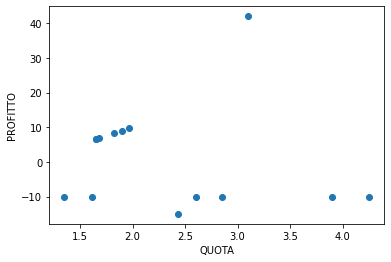

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


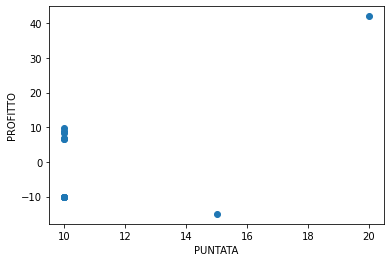

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Running ATP...
[1.6, 3.6, 1.9, 11.0, 10.0, 1.2, 1.8, 1.9, 2.1, 1.5, 1.4, 1.4, 1.5, 1.9, 10.0, 2.1, 0.9, 0.9, 0.9, 10.0, 0.4, 1.8]
[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1]
[1.6, 3.6, 1.9, 11.0, -10.0, 1.2, 1.8, 1.9, 2.1, 1.5, 1.4, 1.4, 1.5, 1.9, -10.0, 2.1, 0.9, 0.9, 0.9, -10.0, 0.4, 1.8]
Profitto totale:  9.8
Profitto medio:  0.44545444421489905  su  22  scommesse
Percentuale di vittoria: 86.36344008309071
Analisi dettagliata: 

18  scommesse prese su  20  con quota inferiore o uguale a 1.5
0  scommesse prese su  1  con quota tra 1.51 e 2
1  scommesse prese su  1  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


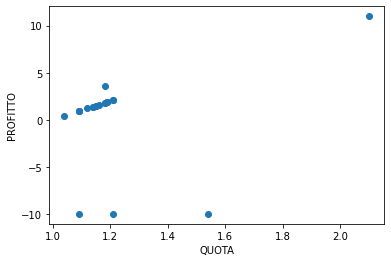

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


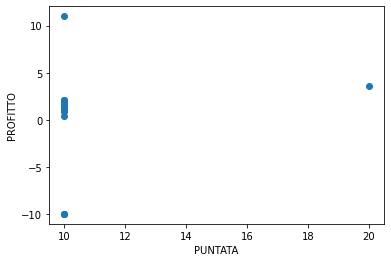

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Running ITF_M...
[1.5, 6.3, 3.6, 2.9, 4.0, 1.4, 3.8, 2.1, 10.0, 1.6, 2.4, 1.2, 10.0, 2.7, 2.3, 2.5, 2.6, 1.8, 1.8, 1.6, 1.9, 1.5, 3.0, 2.7, 2.7, 2.7, 10.0, 2.0, 1.6, 2.2, 1.7]
[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1]
[1.5, 6.3, 3.6, 2.9, 4.0, 1.4, 3.8, 2.1, -10.0, 1.6, 2.4, 1.2, -10.0, 2.7, 2.3, 2.5, 2.6, 1.8, 1.8, 1.6, 1.9, 1.5, 3.0, 2.7, 2.7, 2.7, -10.0, 2.0, 1.6, 2.2, 1.7]
Profitto totale:  38.1
Profitto medio:  1.2290320598335387  su  31  scommesse
Percentuale di vittoria: 90.32243496381457
Analisi dettagliata: 

27  scommesse prese su  29  con quota inferiore o uguale a 1.5
1  scommesse prese su  2  con quota tra 1.51 e 2
0  scommesse prese su  0  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


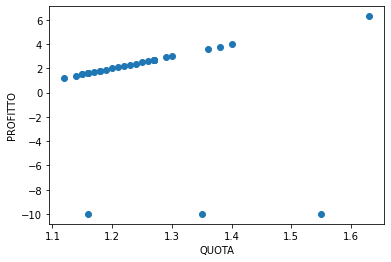

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


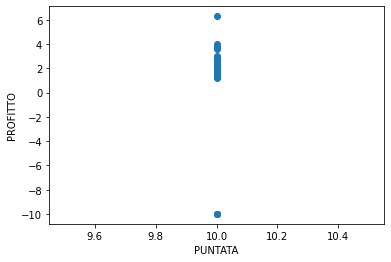

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Running ITF_F...
[16.0, 6.8, 3.2, 5.7, 6.8]
[1, 1, 1, 1, 1]
[16.0, 6.8, 3.2, 5.7, 6.8]
Profitto totale:  38.5
Profitto medio:  7.6999923000077  su  5  scommesse
Percentuale di vittoria: 99.9990000099999
Analisi dettagliata: 

1  scommesse prese su  1  con quota inferiore o uguale a 1.5
3  scommesse prese su  3  con quota tra 1.51 e 2
1  scommesse prese su  1  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


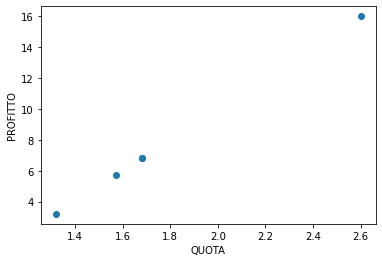

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


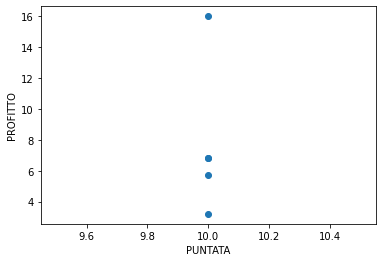

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [ ]:
for tb in types_bet:
    ANALISI(tb)

In [ ]:
def ANALISI_day( label, data_int ):
    print("Running "+label+"...")
    file_atp = file_dt.loc[ ( file_dt.TIPO==label )&( file_dt.GIORNO==data_int) ]
    #file_atp
    qt = list( file_atp['QUOTA'] )
    scms = list( file_atp['SCOMMESSA'] )

    quote = []
    for q in qt:
      q = q.replace(",", ".")
      q = float( q )
      quote.append( q )

    scommesse = []
    for s in scms:
      s = s.replace(",", ".")
      s = s.replace("€", "")
      s = s.strip()
      s = float( s )
      scommesse.append( s )

    profitto_atp = list( file_atp.PROFITTO )
    profitto_atp_ord = []
    segni = []
    for idx, v in enumerate ( profitto_atp ):
        v = v.replace("€", "")
        v = v.strip()
        v = v.replace(',', '.')
        if "-" in v:
            segni.append( -1 )
        else:
            segni.append( 1 )
        v = v.replace('-','')
        v = v.strip()
        v = float( v )
        profitto_atp_ord.append( v )

    print( profitto_atp_ord )
    print( segni )

    lista_finale_atp = []
    for ind, val in enumerate ( profitto_atp_ord ):
        prd = val*segni[ind]
        lista_finale_atp.append( prd )
    numero_scommesse = len( lista_finale_atp )
    print( lista_finale_atp )
    somma_atp = sum( lista_finale_atp )
    somma_atp = round(somma_atp,2) 
    media_profitto = somma_atp/(numero_scommesse+0.000005)
    conto_win = 0
    for lfatp in lista_finale_atp:
      if lfatp>0:
        conto_win = conto_win+1
      else:
        conto_win = conto_win+0
    win_percentage = (conto_win/( numero_scommesse+0.00005) )*100

    win_under_1_5 = 0
    tot_under_1_5 = 0

    win_1_5_2 = 0
    tot_1_5_2 = 0

    win_over_2 = 0
    tot_over_2 = 0
    
    for idx, sc in enumerate ( lista_finale_atp ):
      if quote[idx]<=1.5:
        tot_under_1_5 = tot_under_1_5+1
        if sc>0:
          win_under_1_5 = win_under_1_5+1
      elif ( quote[idx]>1.5 )&( quote[idx]<=2 ):
        tot_1_5_2 = tot_1_5_2+1
        if sc>0:
          win_1_5_2 = win_1_5_2+1
      else:
        tot_over_2 = tot_over_2+1
        if sc>0:
          win_over_2 = win_over_2+1





    print("Profitto totale: ", str( somma_atp ) )
    print("Profitto medio: ", str( media_profitto )," su ", str(numero_scommesse)," scommesse" )
    print("Percentuale di vittoria:", str( win_percentage ) )

    print("Analisi dettagliata: \n")
    print(str( win_under_1_5 ), " scommesse prese su ", str( tot_under_1_5 ), " con quota inferiore o uguale a 1.5" )
    print(str( win_1_5_2 ), " scommesse prese su ", str( tot_1_5_2 ), " con quota tra 1.51 e 2" )
    print(str( win_over_2 ), " scommesse prese su ", str( tot_over_2 ), " con quota superiore a 2 \n" )
    
    print("Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.")
    plt.scatter( quote, lista_finale_atp )
    plt.xlabel("QUOTA")
    plt.ylabel("PROFITTO")
    plt.show()

    print("Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.")
    plt.scatter( scommesse, lista_finale_atp )
    plt.xlabel("PUNTATA")
    plt.ylabel("PROFITTO")
    plt.show()


    
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")

Running BASKET_M...
[10.0, 42.0, 15.0, 6.5, 6.5, 10.0, 10.0, 9.7, 10.0, 6.8, 8.2, 10.0, 9.0, 10.0]
[-1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1]
[-10.0, 42.0, -15.0, 6.5, 6.5, -10.0, -10.0, 9.7, -10.0, 6.8, 8.2, -10.0, 9.0, -10.0]
Profitto totale:  13.7
Profitto medio:  0.9785710790817574  su  14  scommesse
Percentuale di vittoria: 49.99982142920918
Analisi dettagliata: 

0  scommesse prese su  1  con quota inferiore o uguale a 1.5
6  scommesse prese su  7  con quota tra 1.51 e 2
1  scommesse prese su  6  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


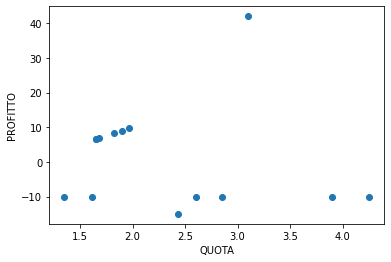

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


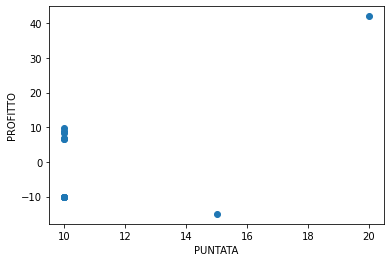

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Running ATP...
[1.6, 3.6, 1.9, 11.0, 10.0, 1.2, 1.8, 1.9, 2.1, 1.5, 1.4, 1.4, 1.5, 1.9, 10.0, 2.1, 0.9, 0.9, 0.9, 10.0, 0.4, 1.8]
[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1]
[1.6, 3.6, 1.9, 11.0, -10.0, 1.2, 1.8, 1.9, 2.1, 1.5, 1.4, 1.4, 1.5, 1.9, -10.0, 2.1, 0.9, 0.9, 0.9, -10.0, 0.4, 1.8]
Profitto totale:  9.8
Profitto medio:  0.44545444421489905  su  22  scommesse
Percentuale di vittoria: 86.36344008309071
Analisi dettagliata: 

18  scommesse prese su  20  con quota inferiore o uguale a 1.5
0  scommesse prese su  1  con quota tra 1.51 e 2
1  scommesse prese su  1  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


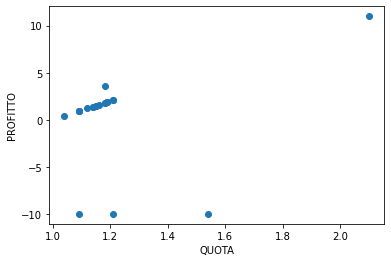

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


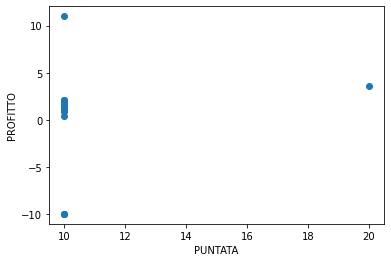

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Running ITF_M...
[1.5, 6.3, 3.6, 2.9, 4.0, 1.4, 3.8, 2.1, 10.0, 1.6, 2.4, 1.2, 10.0, 2.7, 2.3, 2.5, 2.6, 1.8, 1.8, 1.6, 1.9, 1.5, 3.0, 2.7, 2.7, 2.7, 10.0, 2.0, 1.6, 2.2, 1.7]
[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1]
[1.5, 6.3, 3.6, 2.9, 4.0, 1.4, 3.8, 2.1, -10.0, 1.6, 2.4, 1.2, -10.0, 2.7, 2.3, 2.5, 2.6, 1.8, 1.8, 1.6, 1.9, 1.5, 3.0, 2.7, 2.7, 2.7, -10.0, 2.0, 1.6, 2.2, 1.7]
Profitto totale:  38.1
Profitto medio:  1.2290320598335387  su  31  scommesse
Percentuale di vittoria: 90.32243496381457
Analisi dettagliata: 

27  scommesse prese su  29  con quota inferiore o uguale a 1.5
1  scommesse prese su  2  con quota tra 1.51 e 2
0  scommesse prese su  0  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


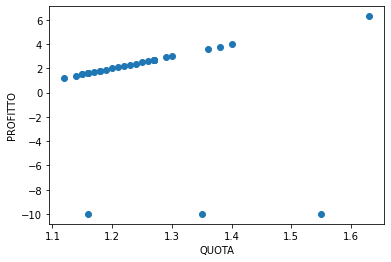

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


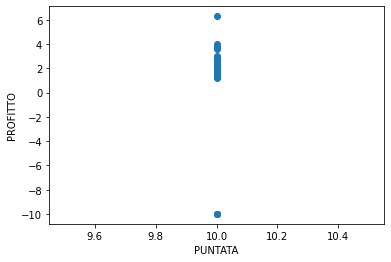

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Running ITF_F...
[16.0, 6.8, 3.2, 5.7, 6.8]
[1, 1, 1, 1, 1]
[16.0, 6.8, 3.2, 5.7, 6.8]
Profitto totale:  38.5
Profitto medio:  7.6999923000077  su  5  scommesse
Percentuale di vittoria: 99.9990000099999
Analisi dettagliata: 

1  scommesse prese su  1  con quota inferiore o uguale a 1.5
3  scommesse prese su  3  con quota tra 1.51 e 2
1  scommesse prese su  1  con quota superiore a 2 

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la quota.


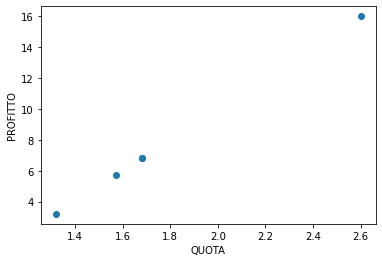

Il GRAFICO A DISPERSIONE SOTTOSTANTE serve per valutare la correlazione tra il profitto e la puntata.


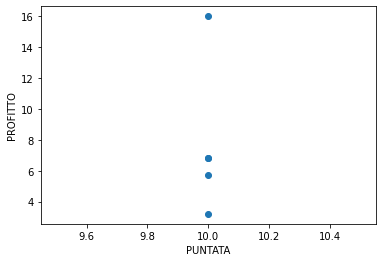

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [ ]:
for tb in types_bet:
    ANALISI_day(tb, "9 genn")